In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.0.9'

In [2]:
import os, shutil

In [28]:
# The path to the directory where the original
# dataset was uncompressed
original_dataset_dir = 'the-simpsons-characters-dataset'

# The directory where we will
# store our smaller dataset
base_dir = 'simpsons'
os.mkdir(base_dir)

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Training
train_bart_dir = os.path.join(train_dir, 'bart')
os.mkdir(train_bart_dir)
# Validation
validation_bart_dir = os.path.join(validation_dir, 'bart')
os.mkdir(validation_bart_dir)
# Test
test_bart_dir = os.path.join(test_dir, 'bart')
os.mkdir(test_bart_dir)

# Same split for homer
train_homer_dir = os.path.join(train_dir, 'homer')
os.mkdir(train_homer_dir)
validation_homer_dir = os.path.join(validation_dir, 'homer')
os.mkdir(validation_homer_dir)
test_homer_dir = os.path.join(test_dir, 'homer')
os.mkdir(test_homer_dir)

In [29]:
bart_pics = os.listdir('the-simpsons-characters-dataset/simpsons_dataset/bart_simpson')
print(len(bart_pics))

1342


In [30]:
len(bart_pics[:int(0.8*len(bart_pics))])

1073

In [31]:
len(bart_pics[int(0.8*len(bart_pics)):])

269

In [32]:
# Copy first 80% bart images to train_bart_dir
fnames = bart_pics[:int(0.8*len(bart_pics))]
for fname in fnames:
    src = os.path.join(original_dataset_dir, 'simpsons_dataset/bart_simpson', fname)
    dst = os.path.join(train_bart_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 20% bart images to validation_bart_dir
fnames = bart_pics[int(0.8*len(bart_pics)):]
for fname in fnames:
    src = os.path.join(original_dataset_dir, 'simpsons_dataset/bart_simpson', fname)
    dst = os.path.join(validation_bart_dir, fname)
    shutil.copyfile(src, dst)

In [33]:
homer_pics = os.listdir('the-simpsons-characters-dataset/simpsons_dataset/homer_simpson')
# Copy first 80% homer images to train_bart_dir
fnames = homer_pics[:int(0.8*len(bart_pics))]
for fname in fnames:
    src = os.path.join(original_dataset_dir, 'simpsons_dataset/homer_simpson', fname)
    dst = os.path.join(train_homer_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 20% homer images to validation_bart_dir
fnames = homer_pics[int(0.8*len(bart_pics)):]
for fname in fnames:
    src = os.path.join(original_dataset_dir, 'simpsons_dataset/homer_simpson', fname)
    dst = os.path.join(validation_homer_dir, fname)
    shutil.copyfile(src, dst)

In [34]:
bart_testfiles = [fname for fname in os.listdir('the-simpsons-characters-dataset/kaggle_simpson_testset') 
                  if 'bart' in fname]
homer_testfiles = [fname for fname in os.listdir('the-simpsons-characters-dataset/kaggle_simpson_testset') 
                  if 'homer' in fname]

In [35]:
for fname in bart_testfiles:
    src = os.path.join(original_dataset_dir, 'kaggle_simpson_testset', fname)
    dst = os.path.join(test_bart_dir, fname)
    shutil.copyfile(src, dst)

for fname in homer_testfiles:
    src = os.path.join(original_dataset_dir, 'kaggle_simpson_testset', fname)
    dst = os.path.join(test_homer_dir, fname)
    shutil.copyfile(src, dst)

In [39]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2146 images belonging to 2 classes.
Found 1442 images belonging to 2 classes.


In [40]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

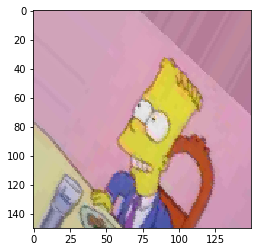

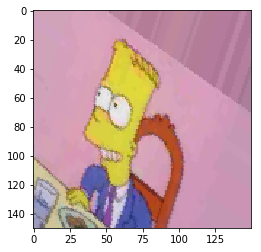

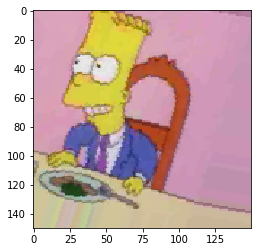

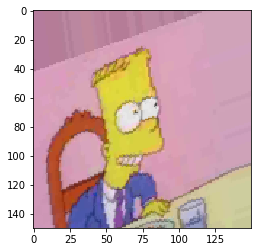

In [43]:
import matplotlib.pyplot as plt
# This is module with image preprocessing utilities
from keras.preprocessing import image

fnames = [os.path.join(train_bart_dir, fname) for fname in os.listdir(train_bart_dir)]

# We pick one image to "augment"
img_path = fnames[3]

# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [60]:
from keras import optimizers
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [61]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [62]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 2146 images belonging to 2 classes.
Found 1442 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

In [ ]:
model.save('bart_vs_homer.h5')

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [58]:
# build the VGG16 network
model = keras.applications.VGG16(weights='imagenet', include_top=False, input_shape = (224,224,3))
print('Model loaded.')

# build a classifier model to put on top of the convolutional model
top_model = models.Sequential()
top_model.add(layers.Flatten(input_shape=model.output_shape[1:]))
top_model.add(layers.Dropout(0.5))
top_model.add(layers.Dense(512, activation='tanh'))
top_model.add(layers.Dense(1, activation='sigmoid'))

# note that it is necessary to start with a fully-trained
# classifier, including the top classifier,
# in order to successfully do fine-tuning
#top_model.load_weights(top_model_weights_path)

# add the model on top of the convolutional base
model.add(top_model)

# set the first 25 layers (up to the last conv block)
# to non-trainable (weights will not be updated)
for layer in model.layers[:25]:
    layer.trainable = False

# compile the model with a SGD/momentum optimizer
# and a very slow learning rate.
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

Model loaded.


AttributeError: 'Model' object has no attribute 'add'

In [ ]:
history2 = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

In [ ]:
# build the VGG16 network
model = applications.VGG16(weights='imagenet', include_top=False)
print('Model loaded.')

# build a classifier model to put on top of the convolutional model
top_model = models.Sequential()
top_model.add(layers.Flatten(input_shape=model.output_shape[1:]))
top_model.add(layers.Dropout(0.5))
top_model.add(layers.Dense(512, activation='relu'))
top_model.add(layers.Dense(1, activation='sigmoid'))

# note that it is necessary to start with a fully-trained
# classifier, including the top classifier,
# in order to successfully do fine-tuning
top_model.load_weights(top_model_weights_path)

# add the model on top of the convolutional base
model.add(top_model)

# set the first 25 layers (up to the last conv block)
# to non-trainable (weights will not be updated)
for layer in model.layers[:25]:
    layer.trainable = False

# compile the model with a SGD/momentum optimizer
# and a very slow learning rate.
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [ ]:
history3 = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)